In [9]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
import binance

client = binance.Client()
data = client.get_historical_klines('ETHBUSD', client.KLINE_INTERVAL_1DAY, '14-Dec-2019', '2-Feb-2023')
for i in range(0, len(data)):
    for j in range(0,11):
        data[i][j] = float(data[i][j])
for line in data:
    del line[2:4]
    del line[2:]

pd.options.display.max_rows = 999999
data = pd.DataFrame(data,columns = ['Date','Close'])
data['Date'] = pd.to_datetime(data['Date'], unit = 'ms',utc = True).map(lambda x:x.tz_convert('Europe/Rome'))
data.set_index('Date', inplace = True)

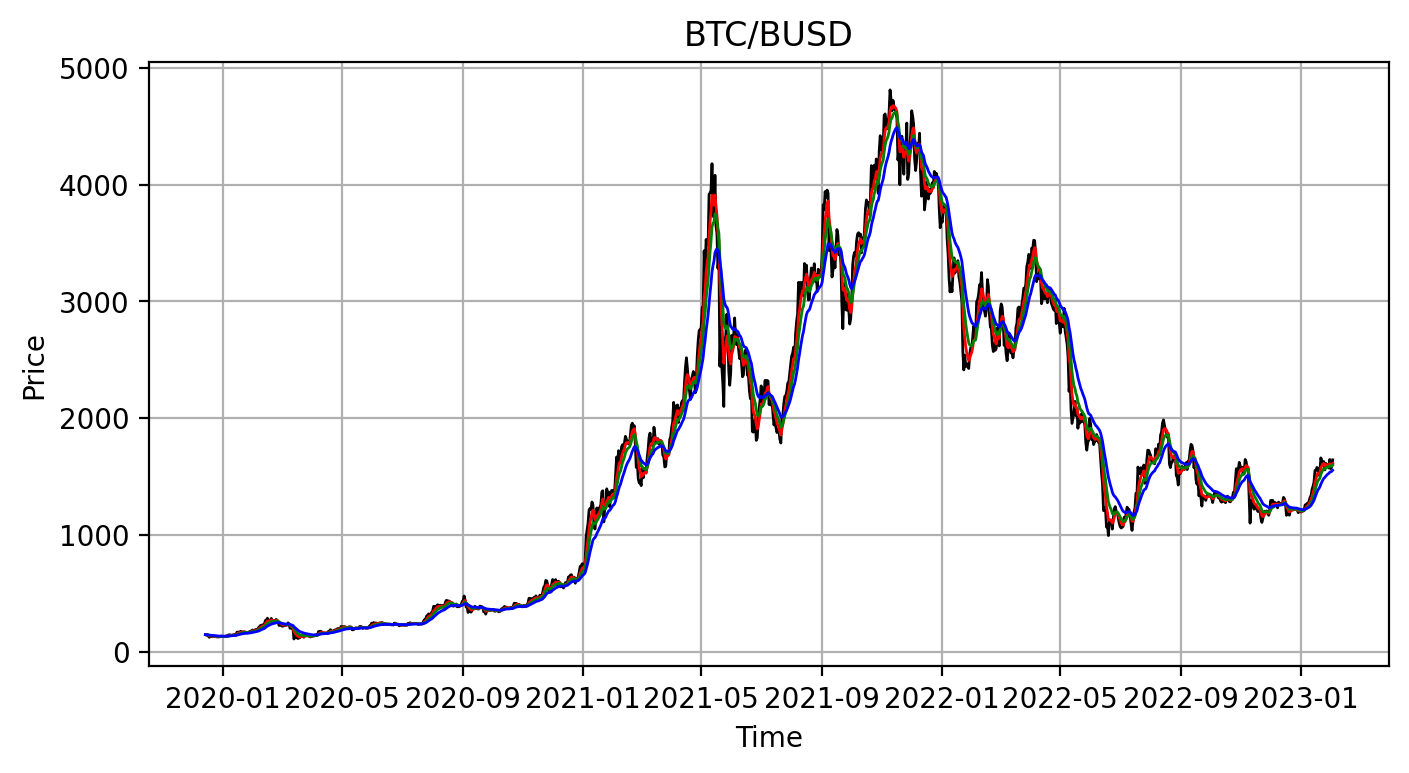

In [10]:
data["EMA5"] = data.Close.ewm(span = 5, adjust = False).mean()
data["EMA10"] = data.Close.ewm(span = 10, adjust = False).mean()
data["EMA20"] = data.Close.ewm(span = 20, adjust = False).mean()

plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Close, color = 'black', linewidth = 1.0)
plt.plot(data.EMA5, color = 'red', linewidth = 1.0)
plt.plot(data.EMA10, color = 'green', linewidth = 1.0)
plt.plot(data.EMA20, color = 'blue', linewidth = 1.0)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BTC/BUSD")
plt.grid(True)
plt.show();

In [11]:
data["DeltaPerc"]= data.Close.pct_change() # variazione percentuale tra la close n e la close n-1

data["Position"] = np.where(((data.EMA5 > data.EMA10) & (data.EMA5 > data.EMA20)), 1, 0) # 1 quando la posizione è aperta / 0 quando è chiusa

data.Position = data.Position.shift(1) # shifto tutto di 1 altrimenti mi prevede il futuro

data["StrategyPerc"] = (data.DeltaPerc * data.Position) # Deltaperc quando Position = 1 / 0 altrimenti

data["Strategy_Equity"] = (data.StrategyPerc + 1).cumprod() * 100

data.dropna(inplace = True)

In [12]:
data.tail(10)

,Close,EMA5,EMA10,EMA20,DeltaPerc,Position,StrategyPerc,Strategy_Equity
Date,,,,,,,,
2023-01-24 01:00:00+01:00,1626.54,1611.595024,1567.333873,1484.439190,-0.000897,1.0,-0.000897,2519.016050
2023-01-25 01:00:00+01:00,1556.21,1593.133350,1565.311351,1491.274505,-0.043239,1.0,-0.043239,2410.096258
2023-01-26 01:00:00+01:00,1612.16,1599.475566,1573.829287,1502.787409,0.035953,1.0,0.035953,2496.745801
2023-01-27 01:00:00+01:00,1601.22,1600.057044,1578.809417,1512.161942,-0.006786,1.0,-0.006786,2479.803067
2023-01-28 01:00:00+01:00,1597.84,1599.318030,1582.269523,1520.321757,-0.002111,1.0,-0.002111,2474.568474
2023-01-29 01:00:00+01:00,1572.30,1590.312020,1580.456882,1525.272066,-0.015984,1.0,-0.015984,2435.014777
2023-01-30 01:00:00+01:00,1645.01,1608.544680,1592.193813,1536.675678,0.046244,1.0,0.046244,2547.620466
2023-01-31 01:00:00+01:00,1566.36,1594.483120,1587.496756,1539.502757,-0.047811,1.0,-0.047811,2425.815523
2023-02-01 01:00:00+01:00,1585.32,1591.428747,1587.100982,1543.866304,0.012104,1.0,0.012104,2455.178800


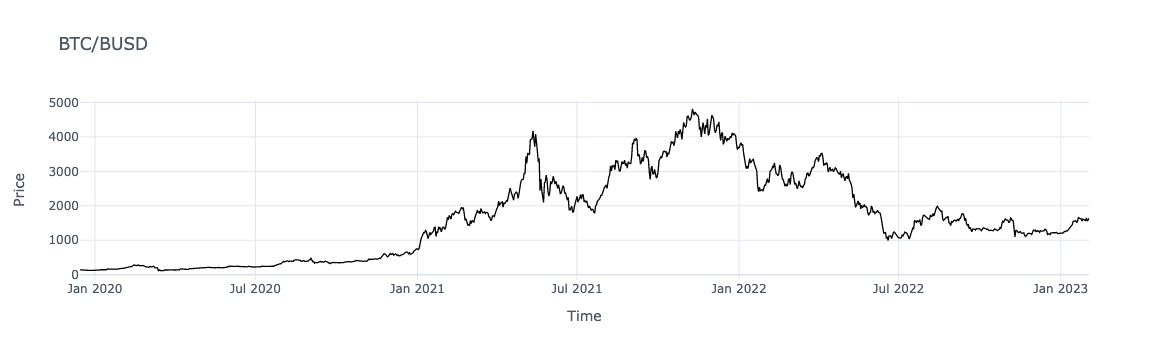

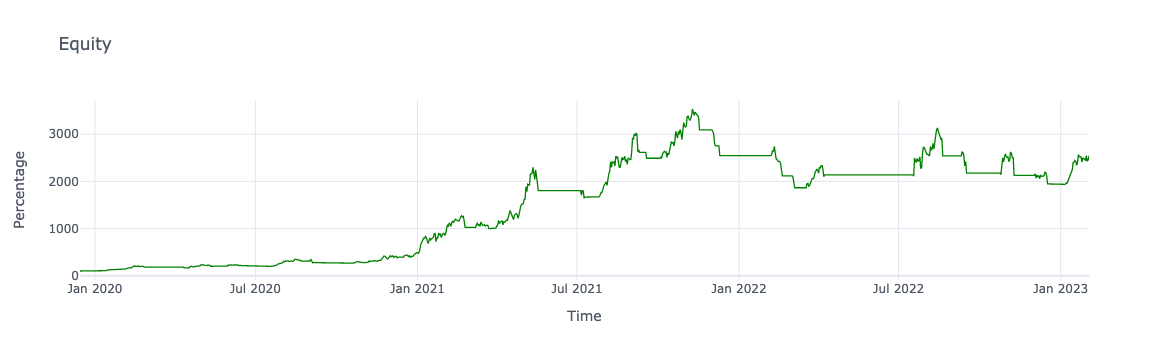

In [13]:
cf.go_offline() # will make cufflinks offline
cf.set_config_file(offline = False, world_readable = True)
data.Close.iplot(kind = "line", color = "black", theme = "white", title = "BTC/BUSD", xTitle = "Time", yTitle = "Price")
data.Strategy_Equity.iplot(kind = "line", color = "green", theme = "white", title = "Equity", xTitle = "Time", yTitle = "Percentage")

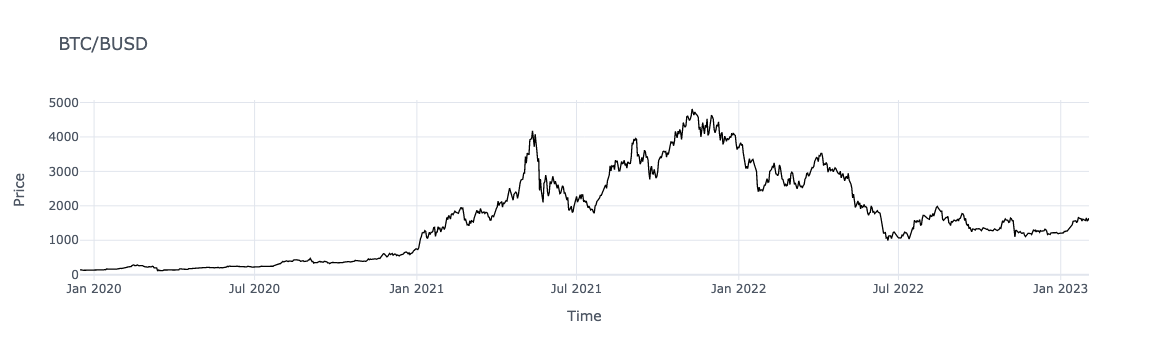

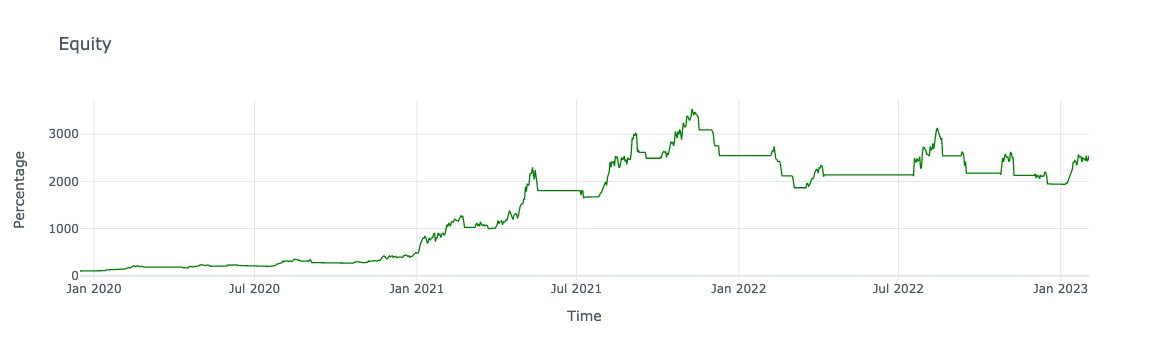

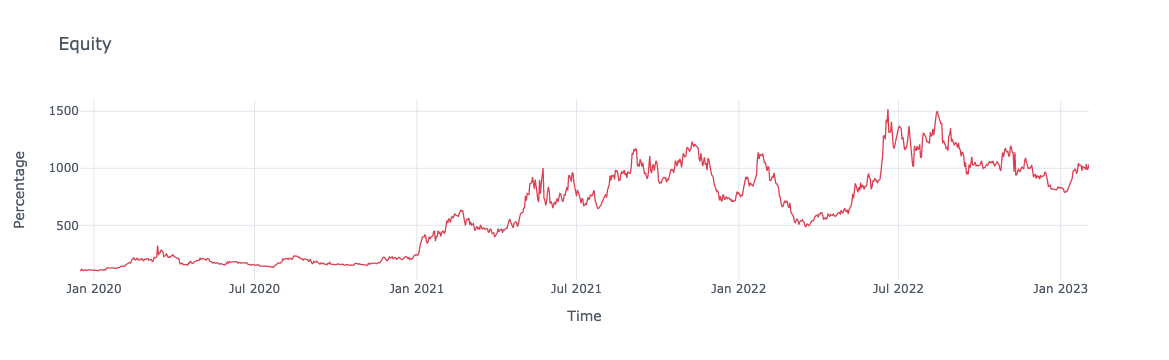

,Close,EMA5,EMA10,EMA20,DeltaPerc,Position,StrategyPerc,Strategy_Equity,Short,ShortPerc,LongShortPercentage,Final_Equity
Date,,,,,,,,,,,,
2019-12-17 01:00:00+01:00,6879.67,7067.404074,7138.561931,7187.540247,-0.032765,0.0,-0.000000,100.000000,1.0,0.032765,0.032765,103.276524
2019-12-18 01:00:00+01:00,6616.65,6917.152716,7043.668853,7133.169748,-0.038231,0.0,-0.000000,100.000000,1.0,0.038231,0.038231,107.224939
2019-12-19 01:00:00+01:00,7285.25,7039.851811,7087.592698,7147.653581,0.101048,0.0,0.000000,100.000000,1.0,-0.101048,-0.101048,96.390061
2019-12-20 01:00:00+01:00,7149.75,7076.484540,7098.894025,7147.853240,-0.018599,0.0,-0.000000,100.000000,1.0,0.018599,0.018599,98.182842
2019-12-21 01:00:00+01:00,7188.00,7113.656360,7115.095112,7151.676741,0.005350,0.0,0.000000,100.000000,1.0,-0.005350,-0.005350,97.657580
2019-12-22 01:00:00+01:00,7134.50,7120.604240,7118.623273,7150.040861,-0.007443,0.0,-0.000000,100.000000,1.0,0.007443,0.007443,98.384441
2019-12-23 01:00:00+01:00,7511.99,7251.066160,7190.144496,7184.512207,0.052911,0.0,0.000000,100.000000,1.0,-0.052911,-0.052911,93.178871
2019-12-24 01:00:00+01:00,7312.76,7271.630773,7212.438224,7196.726283,-0.026522,1.0,-0.026522,97.347840,0.0,0.000000,-0.026522,90.707618
2019-12-25 01:00:00+01:00,7248.35,7263.870516,7218.967638,7201.642827,-0.008808,1.0,-0.008808,96.490411,0.0,0.000000,-0.008808,89.908675
